## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Data Prepocessing


### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Training and Validation',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    crop_to_aspect_ratio=False
)

Found 1834 files belonging to 2 classes.



### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Training and Validation',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    subset=None,
    crop_to_aspect_ratio=False
)

Found 1834 files belonging to 2 classes.


In [5]:
# Check the shapes of training and validation datasets
for images, labels in training_set.take(1):
    print("Training set - Images shape:", images.shape)
    print("Training set - Labels shape:", labels.shape)

for images, labels in validation_set.take(1):
    print("Validation set - Images shape:", images.shape)
    print("Validation set - Labels shape:", labels.shape)


Training set - Images shape: (32, 256, 256, 3)
Training set - Labels shape: (32, 2)
Validation set - Images shape: (32, 256, 256, 3)
Validation set - Labels shape: (32, 2)


In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[1.25000000e+02 1.30000000e+02 1.94000000e+02]
   [1.22105469e+02 1.27105469e+02 1.91105469e+02]
   [1.19175781e+02 1.24175781e+02 1.88175781e+02]
   ...
   [9.38242188e+01 1.07824219e+02 1.68824219e+02]
   [9.10000000e+01 1.05000000e+02 1.66000000e+02]
   [9.10000000e+01 1.05000000e+02 1.66000000e+02]]

  [[1.25000000e+02 1.30000000e+02 1.94000000e+02]
   [1.23036392e+02 1.28036392e+02 1.92036392e+02]
   [1.20140625e+02 1.25140625e+02 1.89140625e+02]
   ...
   [9.47890625e+01 1.08789062e+02 1.69789062e+02]
   [9.19648438e+01 1.05964844e+02 1.66964844e+02]
   [9.19648438e+01 1.05964844e+02 1.66964844e+02]]

  [[1.25941406e+02 1.30941406e+02 1.94941406e+02]
   [1.23103409e+02 1.28103409e+02 1.92103409e+02]
   [1.21062027e+02 1.26062027e+02 1.90062027e+02]
   ...
   [9.49345398e+01 1.08934540e+02 1.69934540e+02]
   [9.38828125e+01 1.07882812e+02 1.68882812e+02]
   [9.38828125e+01 1.07882812e+02 1.68882812e+02]]

  ...

  [[1.22382812e+01 2.28867188e+01 6.58984375e+00]
   [1

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [9]:
model= Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=2,activation='softmax'))

## Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                        

## Model Training 

In [24]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
58/58 [==============================] - 837s 14s/step - loss: 0.1637 - accuracy: 0.9427 - val_loss: 0.2936 - val_accuracy: 0.9460
Epoch 2/10
58/58 [==============================] - 841s 15s/step - loss: 0.1667 - accuracy: 0.9389 - val_loss: 0.2800 - val_accuracy: 0.9618
Epoch 3/10
58/58 [==============================] - 844s 15s/step - loss: 0.1543 - accuracy: 0.9526 - val_loss: 0.2357 - val_accuracy: 0.9575
Epoch 4/10
58/58 [==============================] - 808s 14s/step - loss: 0.1285 - accuracy: 0.9597 - val_loss: 0.2174 - val_accuracy: 0.9569
Epoch 5/10
58/58 [==============================] - 780s 13s/step - loss: 0.1253 - accuracy: 0.9591 - val_loss: 0.2098 - val_accuracy: 0.9749
Epoch 6/10
58/58 [==============================] - 817s 14s/step - loss: 0.1217 - accuracy: 0.9618 - val_loss: 0.1929 - val_accuracy: 0.9771
Epoch 7/10
58/58 [==============================] - 831s 14s/step - loss: 0.0897 - accuracy: 0.9738 - val_loss: 0.0957 - val_accuracy: 0.9738
Epoch 

## Model Evaluation

In [25]:
#Model Evaluation on Training Set
train_loss,train_acc=model.evaluate(training_set)

58/58 [==============================] - 162s 3s/step - loss: 0.1490 - accuracy: 0.9798


In [26]:
print(train_loss,train_acc)

0.14900080859661102 0.979825496673584


In [27]:
#Model Evaluation on Validation Set
val_loss,val_acc=model.evaluate(validation_set)

58/58 [==============================] - 164s 3s/step - loss: 0.1490 - accuracy: 0.9798


In [28]:
print(val_loss,val_acc)

0.1490008533000946 0.979825496673584


## Saving Model


In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'loss': [0.16368119418621063,
  0.16669002175331116,
  0.15434877574443817,
  0.12851597368717194,
  0.12531128525733948,
  0.12169316411018372,
  0.08970913290977478,
  0.09413694590330124,
  0.0954238548874855,
  0.10013176500797272],
 'accuracy': [0.9427480697631836,
  0.9389312863349915,
  0.952562689781189,
  0.9596510529518127,
  0.9591057896614075,
  0.9618320465087891,
  0.9738277196884155,
  0.9743729829788208,
  0.972737193107605,
  0.9743729829788208],
 'val_loss': [0.2936387062072754,
  0.2800455689430237,
  0.23567190766334534,
  0.21736183762550354,
  0.20976316928863525,
  0.1929231584072113,
  0.09568065404891968,
  0.16079367697238922,
  0.1319594383239746,
  0.1490008383989334],
 'val_accuracy': [0.9460196495056152,
  0.9618320465087891,
  0.9574699997901917,
  0.9569247364997864,
  0.9749181866645813,
  0.9770992398262024,
  0.9738277196884155,
  0.9765539765357971,
  0.9765539765357971,
  0.979825496673584]}

In [34]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [35]:
training_history.history['val_accuracy']

[0.9460196495056152,
 0.9618320465087891,
 0.9574699997901917,
 0.9569247364997864,
 0.9749181866645813,
 0.9770992398262024,
 0.9738277196884155,
 0.9765539765357971,
 0.9765539765357971,
 0.979825496673584]

## Accuracy Visualization

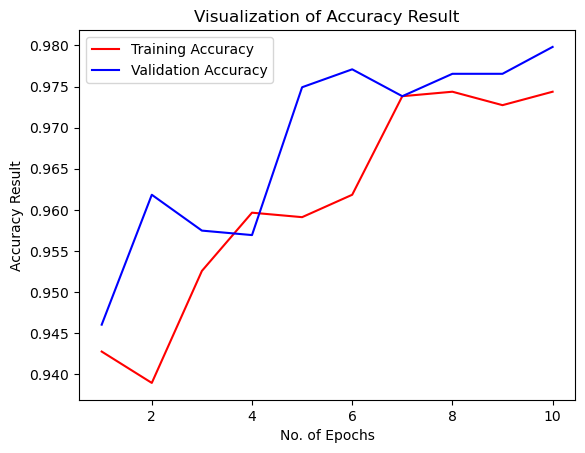

In [33]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other ways for model evaluation

In [39]:
class_name=validation_set.class_names
class_name

['fire', 'nofire']

In [40]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    crop_to_aspect_ratio=False
)

Found 76 files belonging to 2 classes.


In [41]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

3/3 [==============================] - 7s 2s/step


(array([[3.02579869e-02, 9.69742000e-01],
        [3.68753485e-02, 9.63124633e-01],
        [1.51480902e-02, 9.84851897e-01],
        [7.95759633e-02, 9.20424104e-01],
        [8.58534813e-01, 1.41465187e-01],
        [7.30770588e-01, 2.69229412e-01],
        [1.51853770e-01, 8.48146141e-01],
        [9.60112929e-01, 3.98870930e-02],
        [6.17727518e-01, 3.82272422e-01],
        [7.87856638e-01, 2.12143317e-01],
        [9.20342922e-01, 7.96569586e-02],
        [9.19486403e-01, 8.05135742e-02],
        [9.54623520e-01, 4.53765169e-02],
        [9.83577549e-01, 1.64223369e-02],
        [6.92639947e-01, 3.07360053e-01],
        [4.97454494e-01, 5.02545476e-01],
        [8.92613471e-01, 1.07386552e-01],
        [8.44400227e-01, 1.55599877e-01],
        [9.07590926e-01, 9.24090520e-02],
        [5.28177500e-01, 4.71822441e-01],
        [8.64316225e-01, 1.35683835e-01],
        [9.67243314e-01, 3.27567607e-02],
        [8.32689822e-01, 1.67310193e-01],
        [7.18300402e-01, 2.8169950

In [42]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [43]:
predicted_categories

<tf.Tensor: shape=(76,), dtype=int64, numpy=
array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [46]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(76, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],

In [47]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(76,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

## 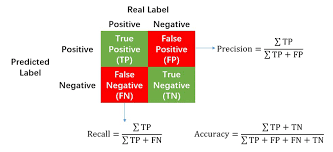

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

        fire       0.87      0.77      0.82        26
      nofire       0.89      0.94      0.91        50

    accuracy                           0.88        76
   macro avg       0.88      0.85      0.86        76
weighted avg       0.88      0.88      0.88        76



In [52]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[20,  6],
       [ 3, 47]], dtype=int64)

### Confusion Matrix Visualization

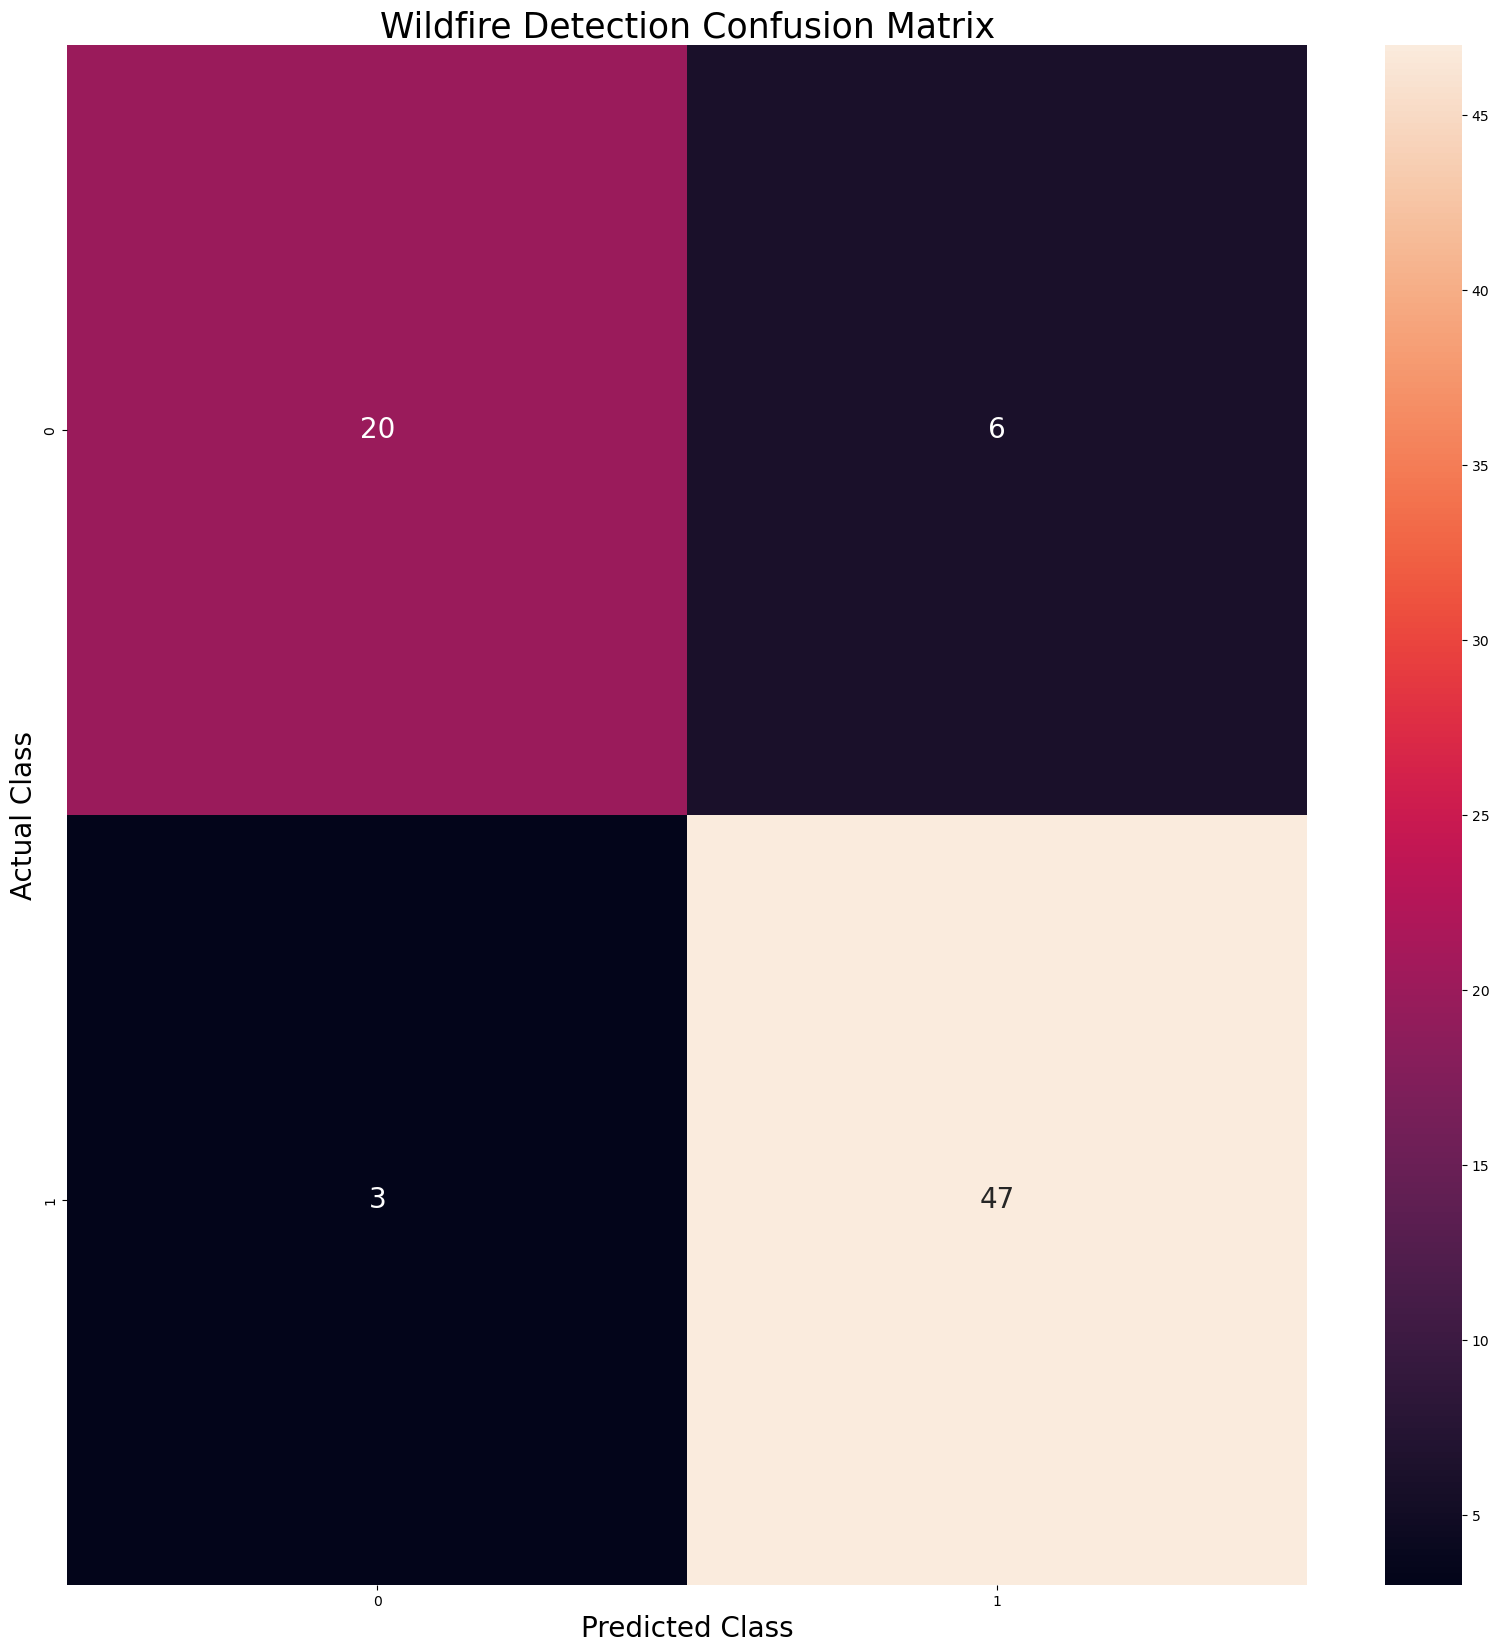

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={'size':20})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Wildfire Detection Confusion Matrix",fontsize=25)
plt.show()